In [1]:
#import the intial libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
#oad the datasets
fake_df = pd.read_csv('Fake.csv')
real_df = pd.read_csv('True.csv')

In [3]:
#view the datasets
print('the fake news dataset looks like this:')
display(fake_df.head())

display('--------------------------------------------------------------------')
print('the real news dataset looks like this:')
display(real_df.head())

the fake news dataset looks like this:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


'--------------------------------------------------------------------'

the real news dataset looks like this:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
#add a label for fake and real news to the datasets 
fake_df['label'] = 0
real_df['label'] = 1

display(fake_df.head())

display('--------------------------------------------------------------------')

display(real_df.head())

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


'--------------------------------------------------------------------'

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
#clean up the subjects to ensure alignment on both datasets
#real news have two subjects
real_df.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [6]:
#fake news have more subjects, so we'll convert the real_df subjects to those found in fake for alignment
fake_df.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [7]:
#map real news subjects to those found in fake df
subject_map = {'politicsNews':'politics','worldnews':'News'}

real_df['subject'] = real_df.subject.map(subject_map)

In [8]:
real_df.sample(10)

,title,text,subject,date,label
15221,Hezbollah calls on Saudi Arabia to cease inter...,BEIRUT (Reuters) - Hezbollah s parliamentary b...,News,"November 9, 2017",1
15959,Netherlands to hold referendum on new surveill...,AMSTERDAM (Reuters) - The Netherlands will ho...,News,"November 1, 2017",1
18289,Ecuador president replaces vice president jail...,QUITO (Reuters) - Ecuador s president on Wedne...,News,"October 4, 2017",1
17674,Migrant deaths in the Sahara likely twice Medi...,GENEVA (Reuters) - West African migrants tryin...,News,"October 12, 2017",1
10193,"Pennsylvania budget to go into effect, ending ...","(Reuters) - Pennsylvania Governor Tom Wolf, a ...",politics,"March 23, 2016",1
11446,Swiss president wants a vote to clarify countr...,ZURICH (Reuters) - A referendum in Switzerland...,News,"December 24, 2017",1
6109,Trump says will renegotiate NAFTA at 'appropri...,WASHINGTON (Reuters) - President Donald Trump ...,politics,"January 23, 2017",1
11395,Attackers torch Democratic Republic of Congo p...,"GOMA, Democratic Republic of Congo (Reuters) -...",News,"December 25, 2017",1
10954,White House says doesn't expect Congress to pa...,WASHINGTON (Reuters) - The White House said on...,politics,"February 5, 2016",1
3741,Trump to meet four candidates for FBI director...,ABOARD AIR FORCE ONE (Reuters) - U.S. Presiden...,politics,"May 17, 2017",1


In [9]:
#combine fake and real news into one dataset
full_df = pd.concat([real_df, fake_df], axis = 0)

In [10]:
#count the number of words in the news titles and add to the dataset
def word_split(title):
    words = title.split()
    
    return len(words)

full_df['title_word_count'] = full_df.title.apply(word_split) 

In [11]:
full_df.head()

,title,text,subject,date,label,title_word_count
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politics,"December 31, 2017",1,10
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politics,"December 29, 2017",1,9
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politics,"December 31, 2017",1,10
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politics,"December 30, 2017",1,9
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politics,"December 29, 2017",1,11


Fake News tend to have longer news titles than real news but this is not always the case.

In [12]:
#apply the same function to text to see word count in the articles as well
full_df['text_word_count'] = full_df['text'].apply(word_split)

full_df.head()

,title,text,subject,date,label,title_word_count,text_word_count
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politics,"December 31, 2017",1,10,749
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politics,"December 29, 2017",1,9,624
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politics,"December 31, 2017",1,10,457
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politics,"December 30, 2017",1,9,376
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politics,"December 29, 2017",1,11,852


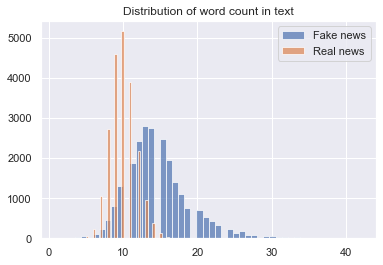

In [13]:
#view the title word count graphically
plt.hist(full_df.loc[(full_df['label'] == 0),'title_word_count' ], label= 'Fake news', alpha = 0.7, bins = 50)
plt.hist(full_df.loc[(full_df['label'] == 1),'title_word_count' ], label= 'Real news', alpha = 0.7, bins = 50)
plt.legend()
plt.title('Distribution of word count in text')
plt.show()

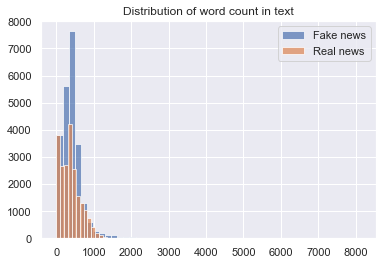

In [14]:
#view the text word count graphically
plt.hist(full_df.loc[(full_df['label'] == 0),'text_word_count' ], label= 'Fake news', alpha = 0.7, bins = 50)
plt.hist(full_df.loc[(full_df['label'] == 1),'text_word_count' ], label= 'Real news', alpha = 0.7, bins = 50)
plt.legend()
plt.title('Distribution of word count in text')
plt.show()

Fake news titles tend to be longer than real news titles. There is no significant different found in the text of the articles however. So we will use the titles to build the classifying model.

In [15]:
#view the statistics of fake news.
#titles can be as long as 42 characters
full_df[full_df['label'] == 0].describe()

,label,title_word_count,text_word_count
count,23481.0,23481.000000,23481.000000
mean,0.0,14.732805,423.197905
std,0.0,4.335099,408.388890
min,0.0,1.000000,0.000000
25%,0.0,12.000000,240.000000
50%,0.0,14.000000,363.000000
75%,0.0,17.000000,506.000000
max,0.0,42.000000,8135.000000


In [16]:
#view the statistics of real news. titles tend to be shorter than fake (max = 20). The std dev is also significantly smaller 
full_df[full_df['label'] == 1].describe()

,label,title_word_count,text_word_count
count,21417.0,21417.000000,21417.000000
mean,1.0,9.954475,385.640099
std,0.0,1.700747,274.006204
min,1.0,4.000000,0.000000
25%,1.0,9.000000,148.000000
50%,1.0,10.000000,359.000000
75%,1.0,11.000000,525.000000
max,1.0,20.000000,5172.000000


In [17]:
#import library to prepare the dataset for model building
from sklearn.model_selection import train_test_split

In [18]:
#Assign features and label
X = full_df['title']
y = full_df['label']

In [19]:
#import text related libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
#dividing the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 123)

In [21]:
#instantiate CountVectorizer with ngrams of 1 and 2 as well as english stop words removed
count_vect = CountVectorizer(ngram_range=(1,2), stop_words='english')

In [22]:
#fit and transform X train on CountVectorizer and transform X test
X_train_cvect = count_vect.fit_transform(X_train)
X_test_cvect = count_vect.transform(X_test)

In [23]:
#import Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

In [24]:
#instantiate Naive Bayes model and fit to above X_train and y
mnb = MultinomialNB()

mnb_count_model = mnb.fit(X_train_cvect, y_train)

In [25]:
#create predictions
mnb_pred = mnb.predict(X_test_cvect)

In [26]:
#evaluate prediction using accuracy score and confusion matrix on X test
from sklearn import metrics
mnb_score = metrics.accuracy_score(y_test, mnb_pred)
print(mnb_score)

0.946369710467706


In [27]:
#confusion matrix
metrics.confusion_matrix(y_test, mnb_pred)

array([[5688,  183],
       [ 419, 4935]], dtype=int64)

In [28]:
#prepare X using Tfidf Vectorizer with the same specs as Count Vectorizer
#fit the vectorized X to Naive Bayes model and make predictions  
tfidf_vect = TfidfVectorizer(ngram_range=(1,2), stop_words='english')

X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

mnb_tfidf = MultinomialNB()
mnb_tf_model = mnb_tfidf.fit(X_train_tfidf, y_train)
mnb_tfidf_pred = mnb_tfidf.predict(X_test_tfidf)

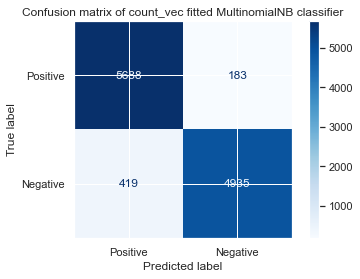

In [29]:
#visualize confusion matrix of count_vec Naive Bayes model
count_plot = metrics.plot_confusion_matrix(mnb_count_model, X_test_cvect, y_test, display_labels= ['Positive','Negative'], cmap= plt.cm.Blues)
plt.title('Confusion matrix of count_vec fitted MultinomialNB classifier')
plt.show()

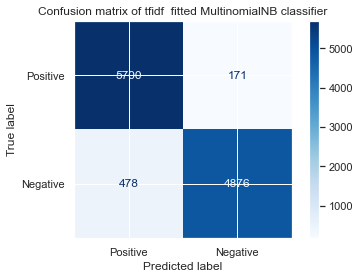

In [30]:
#visualize confusion matrix of tfidf Naive Bayes model
count_plot = metrics.plot_confusion_matrix(mnb_tf_model, X_test_tfidf, y_test, display_labels= ['Positive','Negative'], cmap= plt.cm.Blues)
plt.title('Confusion matrix of tfidf  fitted MultinomialNB classifier')
plt.show()

In [31]:
#show accuracy score of both above models
print('The accuracy score for NaiveBayes count_vec is : ', mnb_score.round(3))
print('The accuracy score for NaiveBayes tfidf is : ', metrics.accuracy_score(y_test, mnb_tfidf_pred).round(3))

The accuracy score for NaiveBayes count_vec is :  0.946
The accuracy score for NaiveBayes tfidf is :  0.942


In [32]:
#trying out another classifier model
from sklearn.svm import LinearSVC

In [33]:
#Prepare X and fit the model as done with Count Vect and Tfidf on Naive Bayes classifier
svc_count_model = LinearSVC()
svc_tfidf_model = LinearSVC()

svc_count_model.fit(X_train_cvect, y_train)
svc_count_pred = svc_count_model.predict(X_test_cvect)
svc_count_score = metrics.accuracy_score(y_test, svc_count_pred)


svc_tfidf_model.fit(X_train_tfidf, y_train)
svc_tfidf_pred = svc_tfidf_model.predict(X_test_tfidf)
svc_tfidf_score = metrics.accuracy_score(y_test, svc_tfidf_pred)

print('The accuracy score for LinearSVC count_vec is :  ', svc_count_score.round(3))
print('The accuracy score for LinearSVC tfidf is :  ',svc_tfidf_score.round(3))

The accuracy score for LinearSVC count_vec is :   0.957
The accuracy score for LinearSVC tfidf is :   0.958


### Test out predictions

I'm going to test out a few article headlines I find online as well as ones I make up to see the efficacy of the LinearSVC tfdif model.

If the output == 0 then the prediction is fake news

If the output == 1 then the prediction is real news

In [34]:
#creating a random title
fake_title = ['Trump blows $10 million on a golf trip to Hawaii with his family and friends']

In [35]:
fake_test_tfidf =  tfidf_vect.transform(fake_title)

In [36]:
fake_test_pred = svc_tfidf_model.predict(fake_test_tfidf)
print(fake_test_pred)

[0]


In [37]:
#source a real title from CNBC
#source: https://www.cnbc.com/2021/02/04/bank-of-england-keeps-interest-rates-and-asset-purchases-unchanged-.html
real_title = ['Bank of England says banks will need six months to prepare for negative rates']
real_title_tfidf = tfidf_vect.transform(real_title)
real_title_pred = svc_tfidf_model.predict(real_title_tfidf)
print(real_title_pred)

[1]
